In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rand
from scipy import stats

# Objective 1: Model random walkers trajectories that move in response to chemoattractants

[5.10745106]
[4.89254894]
[5.02401008]
[4.97598992]
[5.01314899]
[4.98685101]


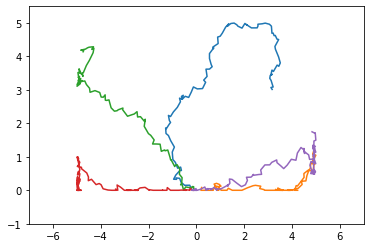

In [42]:
#  ABP model

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =1.0; dt = 0.1; Drot = 1; Dtrans = 0.1; Blen = 10;

#boundary size parameter
Bbox = 10;
Bframe = Blen/5;
num_walks = 5;
maxi = 0;

# outer for loop is for each walker/trajectory
for j in range(num_walks):
    
    # initialize arrays that store x,y and theta values, 
    #as well as initial particle position and angle
    xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0);
    x=0.0; y = 0.0; theta = (2*np.pi)*rand();

    num_steps = 100;
    # inner for loop is each step for a given walker/trajectory
    for i in range(num_steps):
            # calculate diffusive/random steps. For the x- and y-,we generate 
            #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
            
            #dx = np.sqrt(2*Dtrans*dt)*2*; 
            dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            
            dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            
            #dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
            dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5);
            
            # update coordinates (including ballistic step)
            x += vel*dt*np.cos(theta) + dx;
            y += vel*dt*np.sin(theta) + dy;
            
            # implement walled boundary conditions
            if x > Bbox/2:
                x -= 2*(x - Bbox/2)
            elif x < -Bbox/2:
                x -= 2*(x + Bbox/2)
            elif x < Bbox/2 and x > -Bbox/2:
                x += 0
            
            lim = 2;
            if y > Bbox/lim:
                y -= 2*(y - Bbox/lim)
            elif y < 0:
                y = 0*(y + Bbox/lim)
            elif y < Blen/lim and y > -Bbox/lim:
                y += 0
            
        
            # store successive positions in arrays
            xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
            # update the angle and store in array
            theta += dtheta;
            thetavec = np.append(thetavec, theta);
            
            maxi = np.append(maxi,np.max(yvec));
            
    # Plot each trajectory    
    plt.plot(xvec,yvec, '-');
    
    plt.xlim(-Bbox/2 - Bframe, Bbox/2 + Bframe);
    plt.ylim(-1, 1.1*np.max(maxi));
    #plt.axis([-Bbox/2 - Bframe ,Bbox/2 + Bframe,-Bbox/2 - Bframe,Bbox/2 + Bframe], 'equal')

In [ ]:
#lim = 0.1
#            if y > Bbox/lim:
#               print(y)
#                y -= 2*(y - Bbox/lim)
#                print(y)
#            elif y < 0:
#                y = 0*(y + Bbox/lim)
#            elif y < Blen/lim and y > -Bbox/lim:
#                y += 0

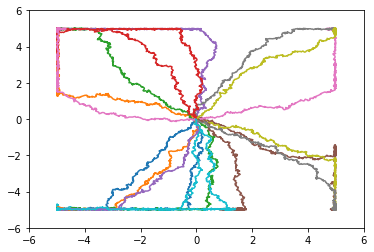

In [14]:
#  ABP model

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =2.0; dt = 0.01; Drot = 0.1; Dtrans = 0.1; Blen = 10;

#boundary size parameter
Bbox = 10
Bframe = Blen/10
num_walks = 20;

# outer for loop is for each walker/trajectory
for j in range(num_walks):
    
    # initialize arrays that store x,y and theta values, 
    #as well as initial particle position and angle
    xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0)
    x=0.0; y = 0.0; theta = (2*np.pi)*rand()

    num_steps = 1000;
    # inner for loop is each step for a given walker/trajectory
    for i in range(num_steps):
            # calculate diffusive/random steps. For the x- and y-,we generate 
            #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
            dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            #dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
            dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5)
            # update coordinates (including ballistic step)
            x += vel*dt*np.cos(theta) + dx 
            y += vel*dt*np.sin(theta) + dy
            
            # implement walled boundary conditions
            if x > Bbox/2:
                x -= 2*(x - Bbox/2)
            elif x < -Bbox/2:
                x -= 2*(x + Bbox/2)
            elif x < Bbox/2 and x > -Bbox/2:
                x += 0
            
            if y > Bbox/2:
                y -= 2*(y - Bbox/2)
            elif y < -Bbox/2:
                y -= 2*(y + Bbox/2)
            elif y < Blen/2 and y > -Bbox/2:
                y += 0
            
        
            # store successive positions in arrays
            xvec = np.append(xvec,x); yvec = np.append(yvec,y) 
            # update the angle and store in array
            theta += dtheta
            thetavec = np.append(thetavec, theta)
            
    # Plot each trajectory    
    plt.plot(xvec,yvec, '-')
    
    plt.xlim(-Bbox/2 - Bframe, Bbox/2 + Bframe)
    plt.ylim(-Bbox/2 - Bframe, Bbox/2 + Bframe)
    
    #plt.axis([-Bbox/2 - Bframe ,Bbox/2 + Bframe,-Bbox/2 - Bframe,Bbox/2 + Bframe], 'equal');